# ZHCPA Dingtalk

Resources:
- [Dingtalk Dev Docs](https://open.dingtalk.com/document/orgapp/create-an-approval-form-template?spm=ding_open_doc.document.0.0.53244a97oo0wyS)
- [Dingtalk Backend API Explorer](https://open-dev.dingtalk.com/apiExplorer#/?devType=org&api=workflow_1.0%23ListProcessInstanceIds)
- [Dingtalk Frontend API Explorer](https://open-dev.dingtalk.com/apiExplorer#/jsapi?api=device.notification.extendModal)
- [Dingtalk Admin Dashboard](https://oa.dingtalk.com/admin/portal/oa#?lang=zh_CN&nation=HK&code=b885d25ac75b3ad2a203ab9fcb3d0799)

Schema:
![](assets/schema.png)

In [18]:
from op.supabase import supabase
import pandas as pd

raw_data = supabase.table("daily_attendance_view").select("*").execute().data
raw_data
raw_df = pd.DataFrame(raw_data)
raw_df

2023-08-22 16:39:06,913:INFO - HTTP Request: GET https://izvbaqnmsstyzmtlgrzl.supabase.co/rest/v1/daily_attendance_view?select=%2A "HTTP/1.1 200 OK"


,opuser_id,name,attendance_date,is_record_valid,check_in_times,check_out_times,attendance_duration_including_break,attendance_duration_including_break_hours,attendance_duration_including_break_minutes,shift_name,shift_job_code,shift_assign_date,shift_start_time,shift_end_time,shift_break_duration,holiday_scheme_name
0,013200084905-1478030917,Jenny.Ng,2023-07-21,True,[2023-07-21T09:30:26],[2023-07-21T18:58:18],09:27:00,9.0,27.0,temp,None,2022-12-31,09:00:00+08,18:00:00+08,01:00:00,hong kong
1,0119630621012099175733,Cathy.Zhao,2023-08-16,True,[2023-08-16T09:13:21],[2023-08-16T18:52:59],09:39:00,9.0,39.0,temp,None,2022-12-31,09:00:00+08,18:00:00+08,01:00:00,hong kong
2,0127504627051249095401,Tim.Zeng,2023-08-15,False,[2023-08-15T09:34:26],[],None,NaN,NaN,temp,None,2022-12-31,09:00:00+08,18:00:00+08,01:00:00,hong kong
3,2214380944-231929829,Ivan.Yung,2023-07-19,True,[2023-07-19T09:26:40],[2023-07-19T18:45:17],09:18:00,9.0,18.0,temp,None,2022-12-31,09:00:00+08,18:00:00+08,01:00:00,hong kong
4,235617236701562735860,John.Choi,2023-08-19,True,[2023-08-19T13:39:16],[2023-08-19T22:30:58],08:51:00,8.0,51.0,temp,None,2022-12-31,09:00:00+08,18:00:00+08,01:00:00,hong kong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,654061044124075204,Loren.Zhang,2023-07-12,False,[2023-07-12T08:31:08],[],None,NaN,NaN,temp,None,2022-12-31,09:00:00+08,18:00:00+08,01:00:00,hong kong
996,2214425114-343401947,Winnie.Yiu,2023-07-05,True,[2023-07-05T09:15:03],[2023-07-05T18:46:51],09:31:00,9.0,31.0,temp,None,2022-12-31,09:00:00+08,18:00:00+08,01:00:00,hong kong
997,23562859004823380188,Seth.Song,2023-08-04,True,[2023-08-04T09:18:04],[2023-08-04T18:44:26],09:26:00,9.0,26.0,temp,None,2022-12-31,09:00:00+08,18:00:00+08,01:00:00,hong kong
998,235619596609-1384927863,Zhiyong.You,2023-07-24,True,[2023-07-24T11:51:25],[2023-07-24T18:44:21],06:52:00,6.0,52.0,temp,None,2022-12-31,09:00:00+08,18:00:00+08,01:00:00,hong kong


2023-08-22 21:53:01,887:INFO - HTTP Request: GET https://izvbaqnmsstyzmtlgrzl.supabase.co/rest/v1/opuser?select=id&name=eq.Patrick.Sze "HTTP/1.1 200 OK"
2023-08-22 21:53:02,091:INFO - HTTP Request: GET https://izvbaqnmsstyzmtlgrzl.supabase.co/rest/v1/opuser_daily_attendance_view?select=%2A&opuser_id=eq.2212052452-370403662&attendance_date=eq.2023-07-01 "HTTP/1.1 200 OK"
2023-08-22 21:53:02,414:INFO - HTTP Request: GET https://izvbaqnmsstyzmtlgrzl.supabase.co/rest/v1/opuser_daily_attendance_view?select=%2A&opuser_id=eq.2212052452-370403662&attendance_date=eq.2023-07-02 "HTTP/1.1 200 OK"
2023-08-22 21:53:02,912:INFO - HTTP Request: GET https://izvbaqnmsstyzmtlgrzl.supabase.co/rest/v1/opuser_daily_attendance_view?select=%2A&opuser_id=eq.2212052452-370403662&attendance_date=eq.2023-07-03 "HTTP/1.1 200 OK"
2023-08-22 21:53:03,286:INFO - HTTP Request: GET https://izvbaqnmsstyzmtlgrzl.supabase.co/rest/v1/opuser_daily_attendance_view?select=%2A&opuser_id=eq.2212052452-370403662&attendance_date

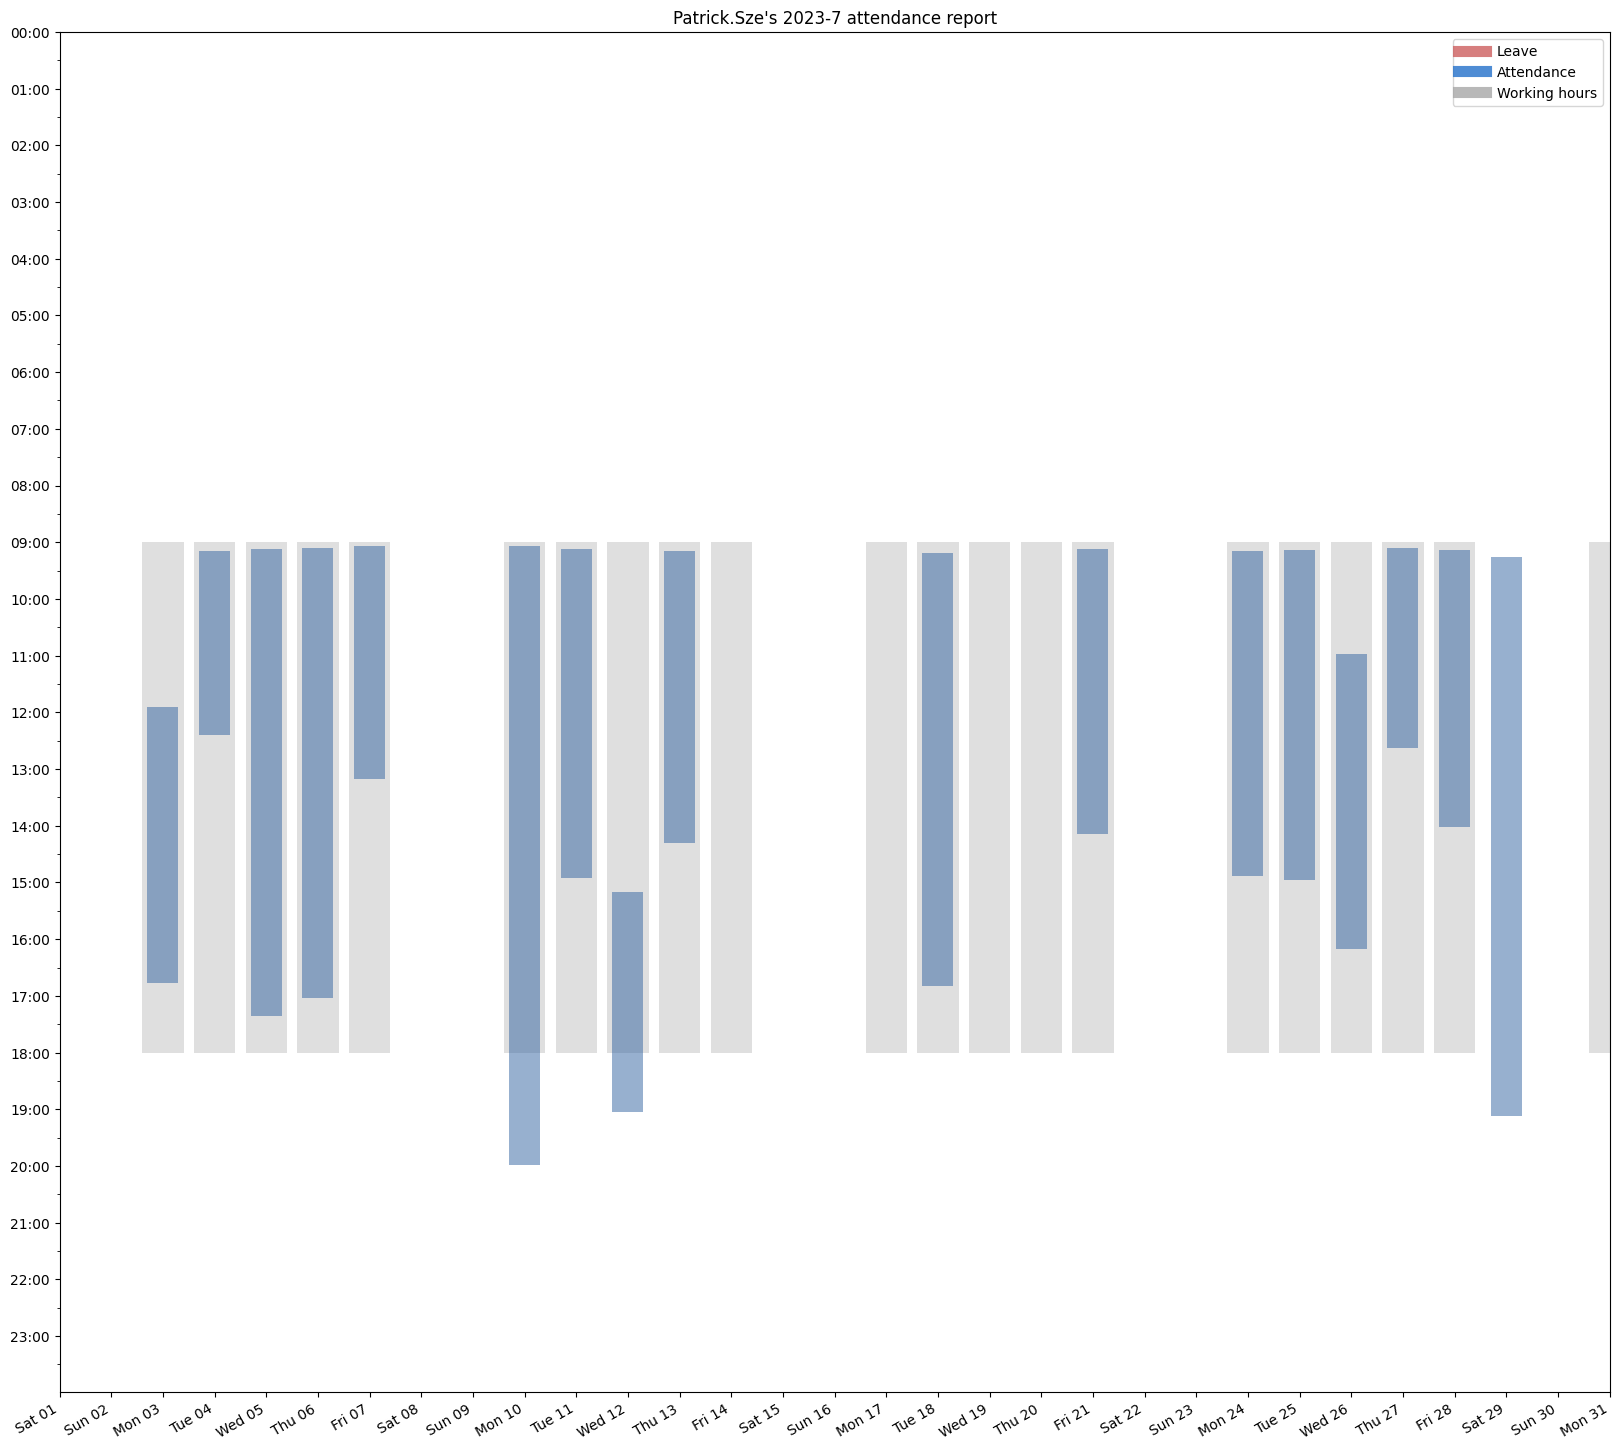

In [136]:
from pprint import pprint
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime, time
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import calendar
from matplotlib.lines import Line2D


year = 2023
month = 7
id = None
name = "Patrick.Sze"

if not id and not name:
    raise Exception("Either id or name must be provided")

fig, ax = plt.subplots(figsize=(20, 20))

# Set the limits for the x-axis
ax.set_xlim(date(year, month, 1), date(year, month + 1, 1) - timedelta(days=1))

# Set the major ticks for the x-axis
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%A %d-%b-%Y"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%a %d"))

# Set the limits for the y-axis
start_time = time(0, 0)
end_time = time(23, 59)

ax.set_ylim(
    start_time.hour * 60 + start_time.minute, end_time.hour * 60 + end_time.minute
)

# Set the major ticks for the y-axis (every hour)
ax.yaxis.set_major_locator(MultipleLocator(base=60))
ax.yaxis.set_major_formatter(lambda x, pos: f"{int(x / 60):02d}:{int(x % 60):02d}")

# Set the minor ticks for the y-axis (every 30 minutes)
ax.yaxis.set_minor_locator(MultipleLocator(base=30))

# Get the number of days in the month
num_days = calendar.monthrange(year, month)[1]

# Get opuser's name
if not name:
    name = (
        supabase.table("opuser")
        .select("name")
        .eq("id", id)
        .single()
        .execute()
        .data["name"]
    )

# Get opuser's id
if not id:
    id = (
        supabase.table("opuser")
        .select("id")
        .eq("name", name)
        .single()
        .execute()
        .data["id"]
    )

# Insert bars

attendance_carry_over: int = 0
for i in range(num_days):
    day = i + 1

    row = (
        supabase.table("opuser_daily_attendance_view")
        .select("*")
        .eq("opuser_id", id)
        .eq("attendance_date", date(year, month, day).isoformat())
        .single()
        .execute()
    ).data

    # Insert attendance data (carry over, if any)

    if attendance_carry_over > 0:
        ax.bar(
            x=date(year, month, day),
            height=(attendance_carry_over),
            bottom=0,
            alpha=0.5,
            width=0.6,
            color="#3063a1",
        )

    attendance_carry_over = 0

    # Insert shift data (don't insert if it's a holiday or an off-day)

    shift_start_time = time.fromisoformat(row["shift_start_time"])
    shift_end_time = time.fromisoformat(row["shift_end_time"])

    if not row["is_holiday"] and not row["is_shift_off_day"]:
        ax.bar(
            x=date(year, month, day),
            height=(
                shift_end_time.hour * 60
                + shift_end_time.minute
                - shift_start_time.hour * 60
                + shift_start_time.minute
            ),
            bottom=shift_start_time.hour * 60 + shift_start_time.minute,
            alpha=0.2,
            width=0.8,
            color="#5f5f5f",
        )

    # Insert opuser attendance data

    if not row["is_record_valid"]:
        continue

    check_in_times = row["check_in_times"]
    check_out_times = row["check_out_times"]
    if len(check_in_times) > 1 or len(check_out_times) > 1:
        continue

    # TODO: draw a bar for each atttendance pair

    start_time = datetime.fromisoformat(check_in_times[0])
    end_time = datetime.fromisoformat(check_out_times[0])

    if end_time.day == start_time.day + 1:
        attendance_carry_over = end_time.hour * 60 + end_time.minute
        end_time = datetime(year, month, day, 23, 59)
    elif end_time.day == start_time.day:
        pass
    else:
        raise Exception("No support for > 24 hours attendance yet")

    ax.bar(
        x=date(year, month, day),
        height=(
            end_time.hour * 60
            + end_time.minute
            - start_time.hour * 60
            + start_time.minute
        ),
        bottom=start_time.hour * 60 + start_time.minute,
        alpha=0.5,
        width=0.6,
        color="#3063a1",
    )

# Insert leaves

leaves = (
    supabase.table("monthly_leave_view")
    .select("*")
    .eq("opuser_id", id)
    .eq("month", date(year, month, 1).isoformat())
    .single()
    .execute()
    .data["leaves"]
)

if leaves:
    for leave in leaves:
        leave_record = (
            supabase.table("leave").select("*").eq("id", leave).single().execute().data
        )

        # TODO: handle leave carry-over
        leave_start_time = datetime.fromisoformat(leave_record["leave_start_time"])
        leave_end_time = datetime.fromisoformat(leave_record["leave_end_time"])

        ax.bar(
            x=date(leave_start_time.year, leave_start_time.month, leave_start_time.day),
            height=(
                leave_end_time.hour * 60
                + leave_end_time.minute
                - leave_start_time.hour * 60
                + leave_start_time.minute
            ),
            bottom=leave_start_time.hour * 60 + leave_start_time.minute,
            alpha=0.15,
            width=0.6,
            color="#963939",
        )

ax.invert_yaxis()

plt.gcf().autofmt_xdate()

plt.legend(loc="upper right")

ax.legend(
    [
        Line2D([0], [0], color="#cc5e5e", lw=8, alpha=0.8),
        Line2D([0], [0], color="#2270ca", lw=8, alpha=0.8),
        Line2D([0], [0], color="#a7a7a7", lw=8, alpha=0.8),
    ],
    ["Leave", "Attendance", "Working hours"],
)

plt.title(f"{name}'s {year}-{month} attendance report")

plt.show()